<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
Imporrt Library
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
   Baca Data csv
</div>


In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("Data_Regresi.csv")
df.head()

,TIME,Promo(X1),Karyawan(X2),Jual(Y)
0,1,248,42,1705
1,2,210,35,1682
2,3,207,32,1663
3,4,153,33,1628
4,5,169,28,1650


<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
 Regresi Sederhana
</div>

alpha = 1673.7105263157894
beta = -1.4676691729323308


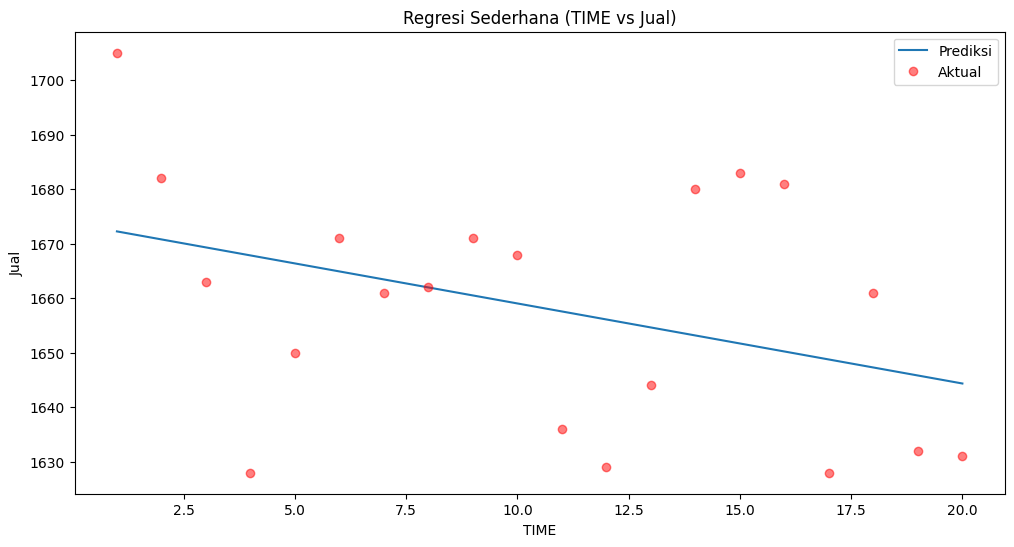

In [3]:
# variable x dan y
x = df["TIME"]
y = df["Jual(Y)"]

# hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# hitung covariance dan variance
xycov = (x - xmean) * (y - ymean)
xvar = (x - xmean)**2

# hitung beta & alpha
beta = xycov.sum() / xvar.sum()
alpha = ymean - (beta * xmean)

print(f"alpha = {alpha}")
print(f"beta = {beta}")

# fungsi prediksi
ypred = alpha + beta * x

# plot
plt.figure(figsize=(12,6))
plt.plot(x, ypred, label="Prediksi")
plt.plot(x, y, "ro", label="Aktual", alpha=0.5)
plt.title("Regresi Sederhana (TIME vs Jual)")
plt.xlabel("TIME")
plt.ylabel("Jual")
plt.legend()

plt.show()

<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
 Regresi Berganda
</div>

In [4]:
# variable x dan y
x = df[["Promo(X1)", "Karyawan(X2)"]]
y = df["Jual(Y)"]

# menambahkan konstanta
x = sm.add_constant(x)

# fit model
model = sm.OLS(y, x). fit()

# koefisien 
koefisien = model.params

print("\nHasil Regresi Berganda (Promo & Karyawan → Jual):")
print(koefisien)


Hasil Regresi Berganda (Promo & Karyawan → Jual):
const           1514.853495
Promo(X1)          0.738604
Karyawan(X2)       0.132930
dtype: float64


<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
  Visualisasi (Scatter Plot 3D)
</div>

In [8]:
# Scatter plot 3D
scatter_plot = go.Scatter3d(
     x=df["Promo(X1)"],
    y=df["Karyawan(X2)"],
    z=df["Jual(Y)"],
    mode="markers",
    marker=dict(size=5, color="blue", opacity=0.8),
    name="Data"
)

# Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(
    np.linspace(df["Promo(X1)"].min(), df["Promo(X1)"].max(), 10),
    np.linspace(df["Karyawan(X2)"].min(), df["Karyawan(X2)"].max(), 10)
)
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

# Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Reds",
    opacity=0.5,
    name="Garis Regresi"
)

# Layout plot
layout = go.Layout(
    title="SRegresi Berganda: Promo dan karyawan -> jual",
    scene=dict(
        xaxis_title="Promo (X1)",
        yaxis_title="Karyawan (X2)",
        zaxis_title="Penjualan (Y)"
    ),
    showlegend=True
)

# Buat figure dan tampilkan
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)
fig.show()